# Covid-19_Outcome-Prediction

## Import the Libraries

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the dataset
df = pd.read_csv('data.csv',index_col=[0])
df.head(6)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


In [4]:
# get the dimensions of the dataset
df.shape

(863, 14)

In [5]:
# find the data types of the attributes
df.dtypes

location          int64
country           int64
gender            int64
age             float64
vis_wuhan         int64
from_wuhan        int64
symptom1          int64
symptom2          int64
symptom3          int64
symptom4          int64
symptom5          int64
symptom6          int64
diff_sym_hos      int64
result            int64
dtype: object

In [6]:
# concise summary of the data
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [7]:
# find if missing values is present
df.isnull().sum()

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
result          0
dtype: int64

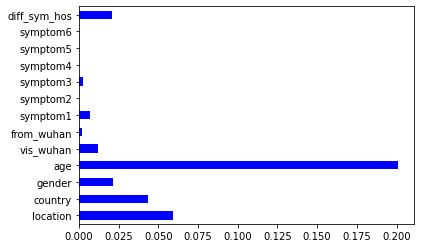

In [8]:
features = df.drop(columns=['result'])
value = df['result']
importances = mutual_info_classif(features , value)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color = 'blue')
plt.show()

<AxesSubplot:xlabel='result', ylabel='count'>

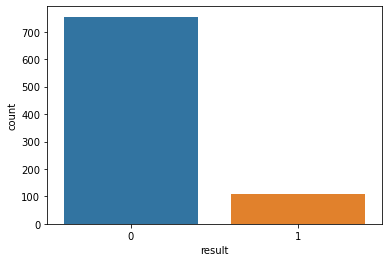

In [9]:
# get the distribution of the target variable
sns.countplot(x="result", data = df)

#### The result show that te number of people that recovered is much greater than the people that died

<AxesSubplot:xlabel='age', ylabel='Count'>

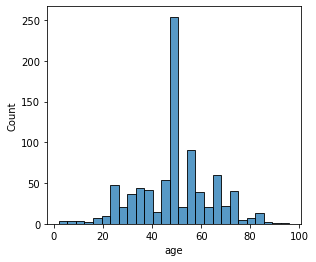

In [10]:
#Plot count of people infected with the age
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
sns.histplot(df['age'])

#### People between the age fo 40 to 60 is the most people infected with corona virus

In [11]:
#one hot encoding data frame
one_hot_encoded_data = pd.get_dummies(df, columns = ['location', 'country', 'gender', 
                                                       'symptom1','symptom2','symptom3','symptom4',
                                                       'symptom5'])
new_df = one_hot_encoded_data

# Modelling with Logistic Regression

In [12]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [13]:
#Split Data into training and testing set
xdat = new_df.drop(columns=['result'])
ydat = new_df['result']
xtr,xts,ytr,yts = train_test_split(xdat, ydat, test_size=0.3, random_state = 0)
print('Training set shape: ', xtr.shape, ytr.shape)
print('Testing set shape: ', xts.shape, yts.shape)

Training set shape:  (604, 275) (604,)
Testing set shape:  (259, 275) (259,)


In [14]:
#instantiate the model
lr = LogisticRegression(multi_class='ovr',solver='liblinear')

#fit the model using the training data
model = lr.fit(xtr, np.ravel(ytr))

# Predict data with classifier: 
pred_y = model.predict(xts)

#Print Accuracy of the model
accuracy = model.score(xts, yts)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.9459459459459459


 ### Comparing the performance of all classifiers using different metrics:

In [20]:
#Performance Classifiers
yts_score=lr.predict_proba(xts)
print('Precision: %.3f' % precision_score(yts, pred_y))
print('Recall: %.3f' % recall_score(yts, pred_y))
print('F1 Score: %.3f' % f1_score(yts, pred_y))
print('roc_auc_score: ',roc_auc_score(yts, yts_score[:,1]))

Precision: 0.926
Recall: 0.676
F1 Score: 0.781
roc_auc_score:  0.9719990260530802


In [21]:
#Classification Report
print(classification_report(yts, pred_y))
print('roc_auc_score: ',roc_auc_score(yts, yts_score[:,1]))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       222
           1       0.93      0.68      0.78        37

    accuracy                           0.95       259
   macro avg       0.94      0.83      0.88       259
weighted avg       0.95      0.95      0.94       259

roc_auc_score:  0.9719990260530802


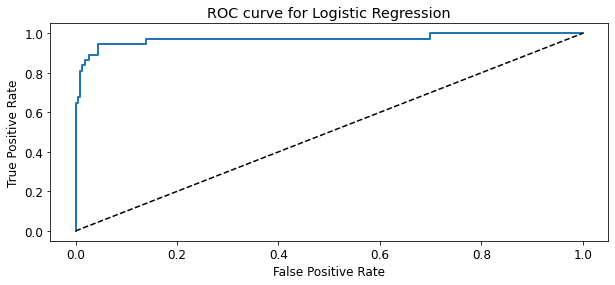

In [24]:
# plot ROC Curve
fpr, tpr, thresholds = roc_curve(yts, yts_score[:,1])
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

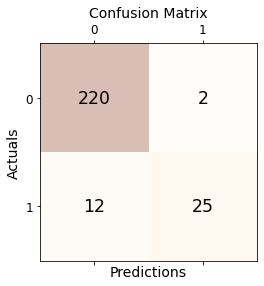

In [23]:
#Plot Confusion Matrix
cm = confusion_matrix(yts, pred_y)
fig, ax = plt.subplots(figsize=(10, 4))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

#### True Positives = 220, True Negatives = 25, False Positives = 2, False Negatives = 12.